In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sb

In [21]:
df = pd.read_csv("logistic_regression_dataset.csv")
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1.0
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0.0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0.0


In [22]:
#data preprocessing  
df.dropna(axis=0, how='any', thresh=None,inplace=True)
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [25]:
#convert Categorical features (sex ; is_smoking) to Numerical Features

#preparing data for logistic regression
df["sex"]=df["sex"].map({"M": 1, "F": 0})   #convert sex variable into numerical
df["is_smoking"]=df["is_smoking"].map({"YES": 1, "NO": 0})   #convert is_smoking variable into numerical
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,4.0,NaN,NaN,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
2,2,46,1.0,NaN,NaN,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0.0
3,3,50,1.0,NaN,NaN,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
4,4,64,1.0,NaN,NaN,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0.0
5,5,61,3.0,NaN,NaN,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1.0


In [24]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x = df[['age','education','sex','is_smoking','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']]
y = df['TenYearCHD']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.84


C:\Users\NADIA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:xlabel='age', ylabel='TenYearCHD'>

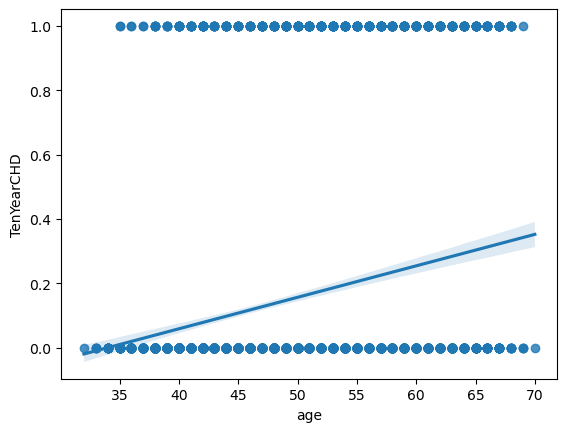

In [31]:
# logistic regression distribution

sb.regplot(x='age',y='TenYearCHD',data=df)

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       612
         1.0       0.50      0.02      0.03       120

    accuracy                           0.84       732
   macro avg       0.67      0.51      0.47       732
weighted avg       0.78      0.84      0.77       732



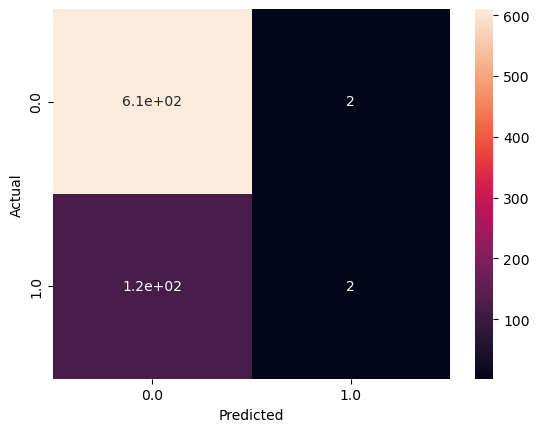

In [33]:
#Confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sb.heatmap(confusion_matrix, annot=True)

#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


The ROC curve is a useful tool for a few reasons:

The curves of different models can be compared directly in general or for different thresholds.
The area under the curve (AUC) can be used as a summary of the model skill.

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.655


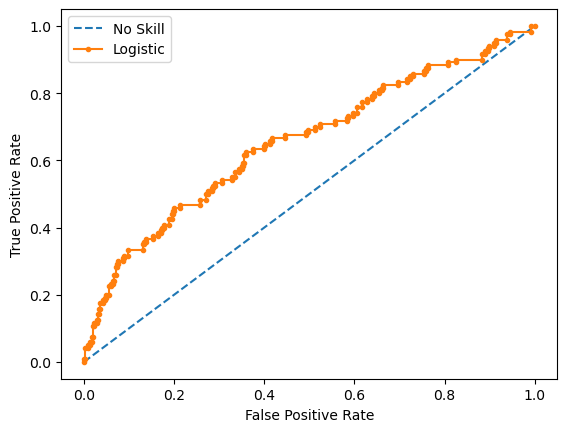

In [31]:
#   ROC 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = logreg.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

ROC curves typically feature true positive rate (TPR) on the Y axis, and false positive rate (FPR) on the X axis. This means that the top left corner of the plot is the “ideal” point - a FPR of zero, and a TPR of one. 